In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import pearsonr
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv('ai_job_dataset.csv')
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [3]:
df.shape

(15000, 19)

In [4]:
df.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [5]:
df.isna().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [102]:
df.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [3]:
groupedJobTitle = df.groupby(['job_title'])
meanSalaryByJob = groupedJobTitle['salary_usd'].mean().reset_index()
meanSalaryByJob.columns = ['job_title', 'mean_salary_usd']
sortedMeanSalaryByJob = meanSalaryByJob.sort_values(by='mean_salary_usd', ascending=False)
print(sortedMeanSalaryByJob)

                      job_title  mean_salary_usd
5                 AI Specialist    120570.758242
14    Machine Learning Engineer    118827.919689
12                   Head of AI    118542.968627
3         AI Research Scientist    117897.925926
0                  AI Architect    117436.513619
19            Robotics Engineer    116470.793149
17     Principal Data Scientist    116305.219346
18           Research Scientist    116066.502695
9                 Data Engineer    115970.720961
10               Data Scientist    115819.008333
13              ML Ops Engineer    115431.335172
2            AI Product Manager    114680.909825
4          AI Software Engineer    114273.201531
11       Deep Learning Engineer    113725.632312
1                 AI Consultant    113671.870739
7      Computer Vision Engineer    113472.707182
16                 NLP Engineer    112670.937008
15  Machine Learning Researcher    112621.747525
6   Autonomous Systems Engineer    111396.557272
8                  D

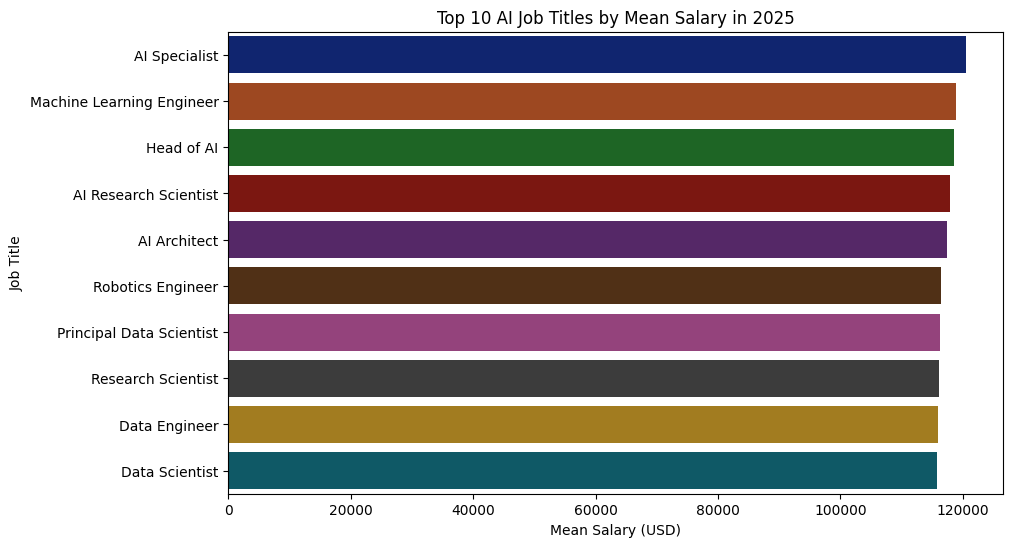

In [4]:
def plotMeanSalaryByJob(sortedMeanSalaryByJob):
    plt.figure(figsize=(10,6))
    sb.color_palette('hls', 8)
    sb.barplot(data=sortedMeanSalaryByJob.head(10), x='mean_salary_usd', y='job_title', palette='dark', hue='job_title', legend=False)
    plt.title('Top 10 AI Job Titles by Mean Salary in 2025')
    plt.xlabel('Mean Salary (USD)')
    plt.ylabel('Job Title')
    plt.savefig('top_10_ai_jobs_by_avg_salary_barplot.png')
    plt.show()

plotMeanSalaryByJob(sortedMeanSalaryByJob)

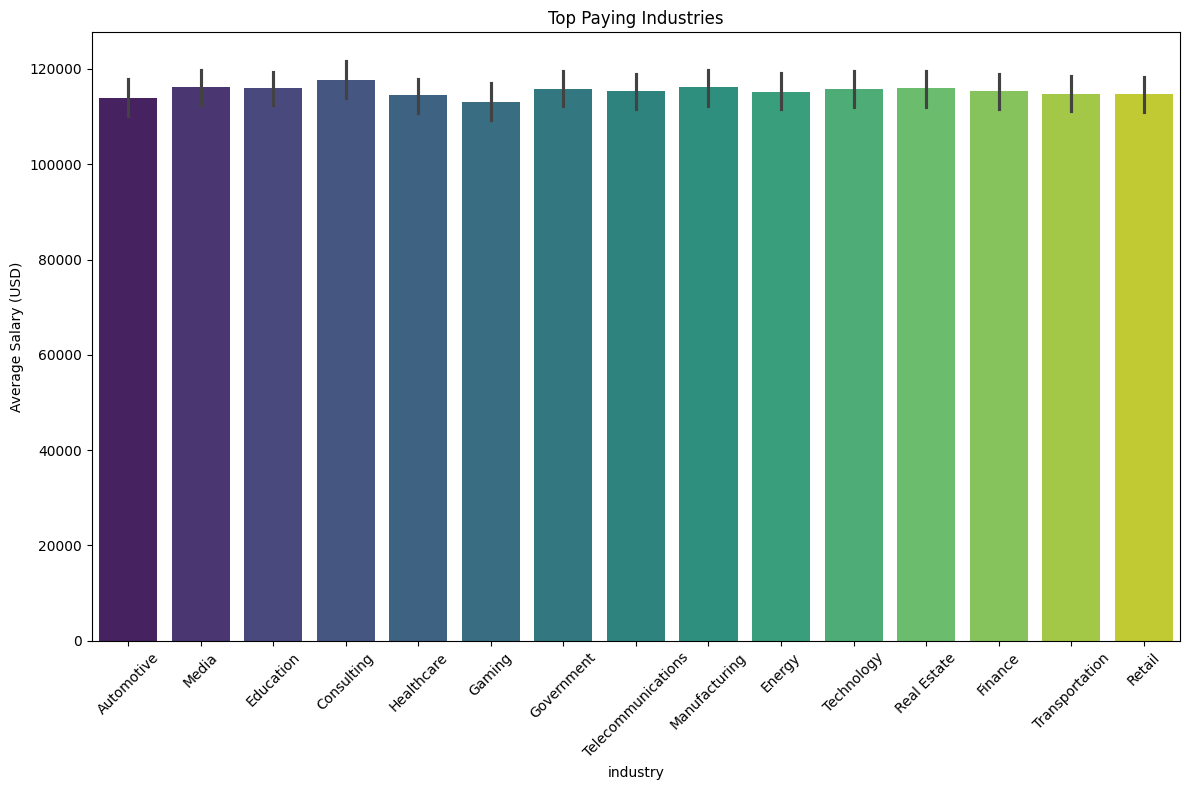

In [ ]:
def plotTopPayingIndustries(data):
    plt.figure(figsize=(12, 8))
    sb.barplot(data=data, x="industry", y="salary_usd", estimator="mean", hue='industry', legend=False, palette='viridis')
    plt.title("Top Paying Industries")
    plt.ylabel("Average Salary (USD)")
    plt.xticks(rotation=45)
    plt.savefig('top_paying_industries_barplot.png')
    plt.tight_layout()
    plt.show()
plotTopPayingIndustries(df)

In [4]:
experienceMap = {
    'EN': 'Entry Level',
    'MI': 'Mid-Level',
    'SE': 'Senior',
    'EX': 'Executive'
}

df['experience_level'] = df['experience_level'].map(experienceMap)

In [5]:
salaryByExperience = df.groupby(['experience_level'])
meanSalaryByExperience = salaryByExperience['salary_usd'].mean().reset_index()
#print(meanSalaryByExperience)
meanSalaryByExperience.columns = ['experience_level', 'mean_salary_usd']
meanSalaryByExperience['mean_salary_usd'] = meanSalaryByExperience['mean_salary_usd'].round(2)

meanSalaryByExperience = meanSalaryByExperience.sort_values(by='mean_salary_usd', ascending=False)

print(meanSalaryByExperience)

  experience_level  mean_salary_usd
1        Executive        187723.65
3           Senior        122187.66
2        Mid-Level         87955.47
0      Entry Level         63133.38


In [6]:
experienceCounts = df.groupby('experience_level').size().reset_index(name='count')
print(experienceCounts)

  experience_level  count
0      Entry Level   3718
1        Executive   3760
2        Mid-Level   3781
3           Senior   3741


In [8]:
def plotMeanSalaryByExperience(meanSalaryByExperience):
        plt.figure(figsize=(8, 6))
        sb.barplot(
            data=meanSalaryByExperience,
            x='experience_level',
            y='mean_salary_usd',
            order=['Entry Level', 'Mid-Level', 'Senior', 'Executive'],
            hue='mean_salary_usd',
            legend=False,
            palette='dark'
            )
        plt.title('Mean Salary by Experience Level in 2025')
        plt.xlabel('Experience Level')
        plt.ylabel('Mean Salary (USD)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('avg_salary_by_experience_barplot.png', dpi=300)
        plt.show()

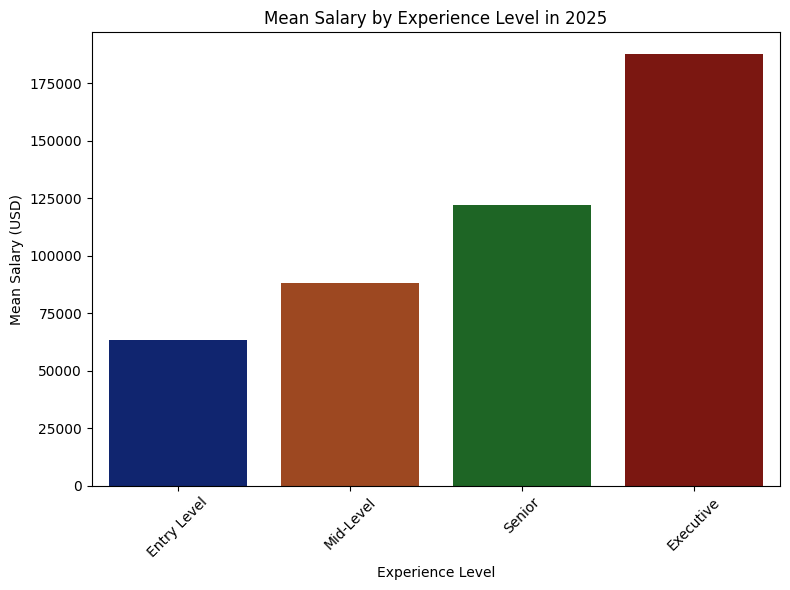

In [68]:
plotMeanSalaryByExperience(meanSalaryByExperience)

In [7]:
locationCounts = df['company_location'].value_counts()
locations = locationCounts.index
counts = locationCounts.values
percentagesCounts = 100 * counts / counts.sum()


In [65]:
def pieChartCompanyLocation(counts, locations, percentages):
    plt.figure(figsize=(12, 10))
    plt.pie(
        counts, 
        labels=[f'{loc} ({pct:.1f}%)' for loc, pct in zip(locations, percentages)],
        startangle=140,
        colors=plt.cm.tab20(range(len(locations))),
        textprops={'fontsize': 8},
        labeldistance=1.1,
        pctdistance=0.85
    )
        
    """for text in texts:
        text.set_fontsize(8)  
    for autotext in autoTexts:
        autotext.set_fontsize(7)  
        autotext.set_color('white')  """
    
    plt.title('Distribution of AI Jobs by Company Location in 2025', fontsize=14)
    plt.axis('equal')
    plt.savefig('piechart_company_location.png', dpi=300)
    plt.show()

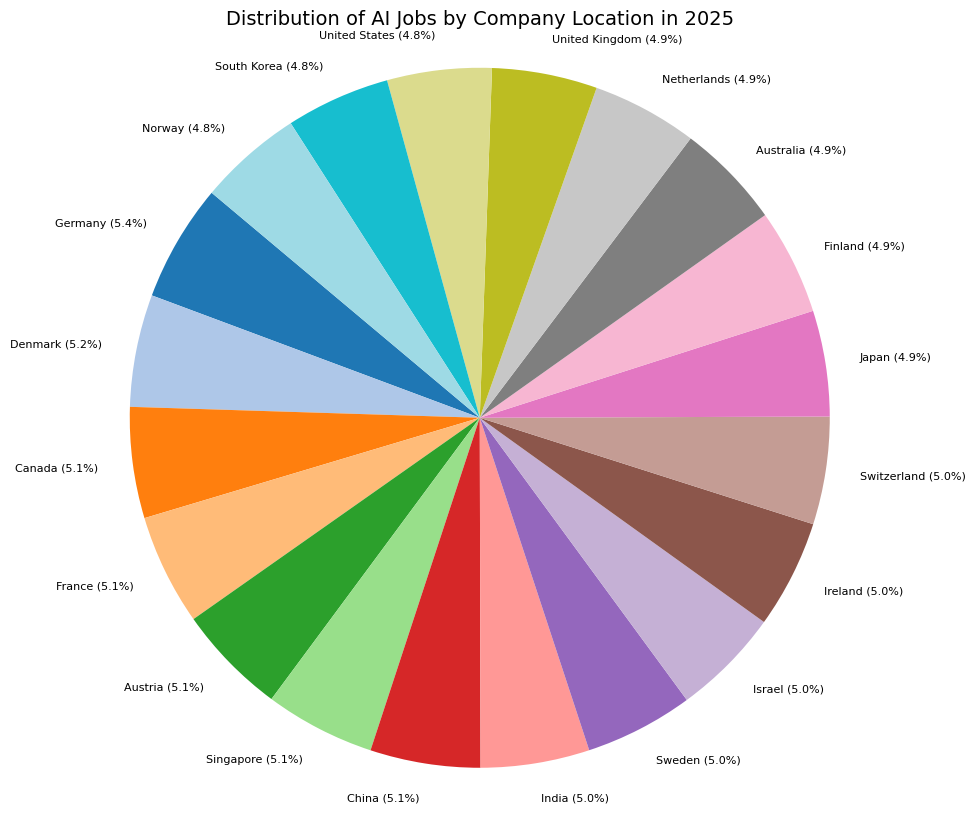

In [66]:
pieChartCompanyLocation(counts, locations, percentagesCounts)

In [8]:
avgSalaryByLocation = df.groupby('company_location')['salary_usd'].mean().reset_index()
avgSalaryByLocation.columns = ['company_location', 'mean_salary_usd']
avgSalaryByLocation['mean_salary_usd'] = avgSalaryByLocation['mean_salary_usd'].round(2)
avgSalaryByLocation = avgSalaryByLocation.sort_values(by='mean_salary_usd', ascending=False)

print(f'Average Salary by Company Location: {avgSalaryByLocation}')

Average Salary by Company Location:    company_location  mean_salary_usd
17      Switzerland        170639.09
4           Denmark        165652.25
13           Norway        159490.53
19    United States        146833.05
18   United Kingdom        128720.19
14        Singapore        128004.04
12      Netherlands        126750.45
16           Sweden        123559.75
7           Germany        121810.14
0         Australia        118238.89
6            France        114411.36
2            Canada        114253.31
5           Finland         88726.24
10           Israel         86989.63
11            Japan         86861.11
9           Ireland         86061.04
15      South Korea         85842.70
1           Austria         85174.53
3             China         84899.00
8             India         84236.05


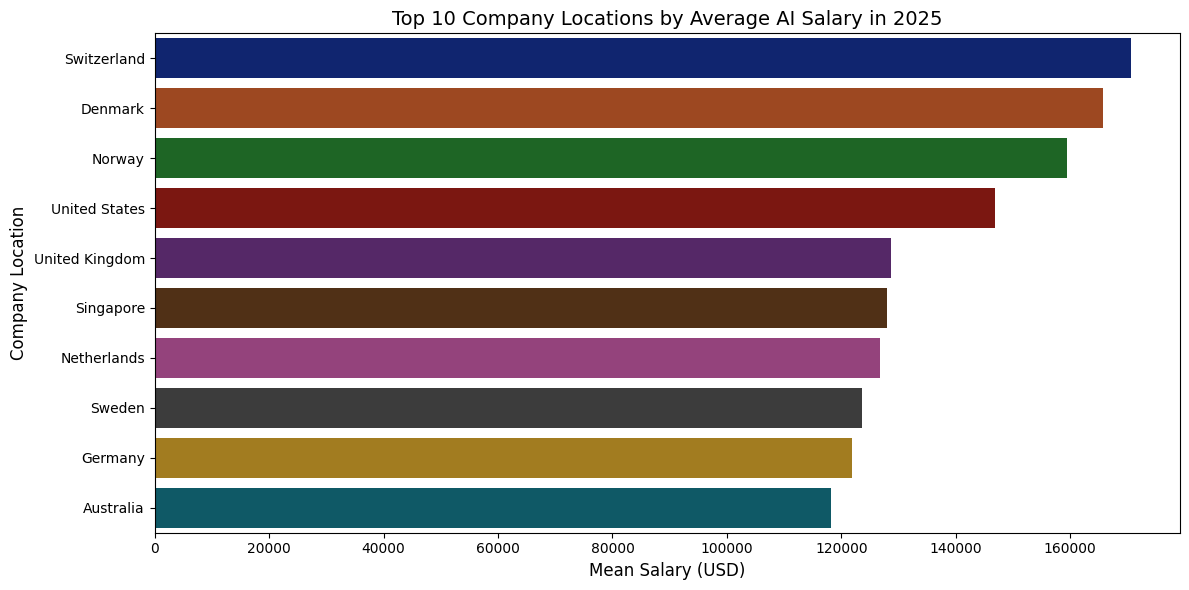

In [62]:
def plotTop10LocationsByAvgSalary(avgSalaryByLocation):
    plt.figure(figsize=(12, 6))
    sb.barplot(data=avgSalaryByLocation.head(10), x='mean_salary_usd', y='company_location', palette='dark', hue='company_location', legend=False)
    plt.title('Top 10 Company Locations by Average AI Salary in 2025', fontsize=14)
    plt.xlabel('Mean Salary (USD)', fontsize=12)
    plt.ylabel('Company Location', fontsize=12)
    plt.tight_layout()
    plt.savefig('avg_salary_by_location_barplot.png', dpi=300)
    plt.show()
plotTop10LocationsByAvgSalary(avgSalaryByLocation)

In [9]:
avgSalaryByExpLocation = df.groupby(['company_location', 'experience_level'])['salary_usd'].mean().reset_index()
avgSalaryByExpLocation.columns = ['company_location', 'experience_level', 'mean_salary_usd']
avgSalaryByExpLocation['mean_salary_usd'] = avgSalaryByExpLocation['mean_salary_usd'].round(2)
pivotTable = avgSalaryByExpLocation.pivot(index='company_location',
                                          columns='experience_level',
                                          values='mean_salary_usd')

pivotTable = pivotTable[['Entry Level', 'Mid-Level', 'Senior', 'Executive']]

print(pivotTable)

experience_level  Entry Level  Mid-Level     Senior  Executive
company_location                                              
Australia            66301.06   90000.27  129865.90  193824.07
Austria              48087.38   64852.80   90906.15  139184.30
Canada               62808.09   85798.69  122478.56  183638.28
China                46843.13   66122.87   91252.03  140369.95
Denmark              88182.36  119617.49  170118.00  257408.88
Finland              46949.54   64689.80   92240.83  141889.25
France               64281.09   88790.31  120906.75  184115.84
Germany              65729.52   93725.01  128490.30  194637.86
India                46680.86   65519.28   92253.06  138655.09
Ireland              48430.21   65523.01   91156.13  142415.91
Israel               48387.07   65717.67   91452.41  139736.32
Japan                46157.67   65193.97   92864.63  141176.20
Netherlands          70503.83   97494.28  134097.96  208304.61
Norway               86967.22  121779.59  169039.56  25

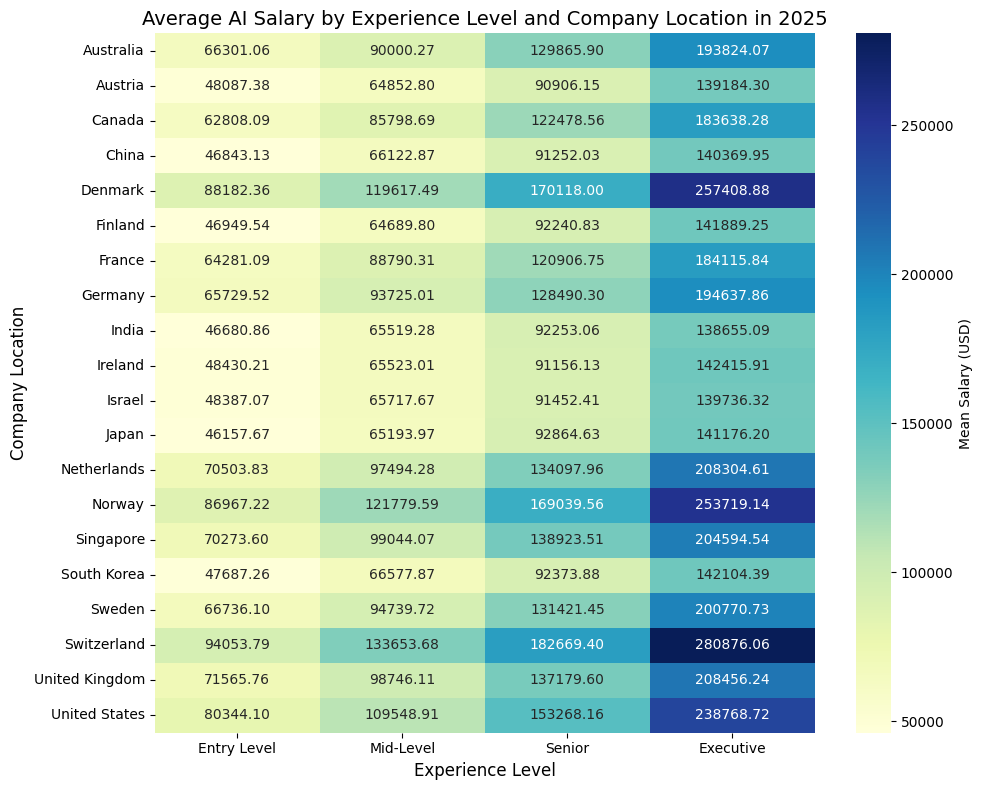

In [51]:
def plotAvgSalaryByExpLocation(pivotTable):
    plt.figure(figsize=(10, 8))
    sb.heatmap(pivotTable, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Mean Salary (USD)'})
    plt.title('Average AI Salary by Experience Level and Company Location in 2025', fontsize=14)
    plt.xlabel('Experience Level', fontsize=12)
    plt.ylabel('Company Location', fontsize=12)
    plt.tight_layout()
    #plt.savefig('salary_by_exp_location_heatmap.png')
    plt.show()
plotAvgSalaryByExpLocation(pivotTable)

In [10]:
avgSalaryByExpPos = df.groupby(['job_title', 'experience_level'])['salary_usd'].mean().reset_index()
avgSalaryByExpPos.columns = ['job_title', 'experience_level', 'mean_salary_usd']
avgSalaryByExpPos['mean_salary_usd'] = avgSalaryByExpPos['mean_salary_usd'].round(2)
pivotTable2 = avgSalaryByExpPos.pivot(index='job_title',
                                          columns='experience_level',
                                          values='mean_salary_usd')

pivotTable2 = pivotTable[['Entry Level', 'Mid-Level', 'Senior', 'Executive']]

print(pivotTable2)

experience_level  Entry Level  Mid-Level     Senior  Executive
company_location                                              
Australia            66301.06   90000.27  129865.90  193824.07
Austria              48087.38   64852.80   90906.15  139184.30
Canada               62808.09   85798.69  122478.56  183638.28
China                46843.13   66122.87   91252.03  140369.95
Denmark              88182.36  119617.49  170118.00  257408.88
Finland              46949.54   64689.80   92240.83  141889.25
France               64281.09   88790.31  120906.75  184115.84
Germany              65729.52   93725.01  128490.30  194637.86
India                46680.86   65519.28   92253.06  138655.09
Ireland              48430.21   65523.01   91156.13  142415.91
Israel               48387.07   65717.67   91452.41  139736.32
Japan                46157.67   65193.97   92864.63  141176.20
Netherlands          70503.83   97494.28  134097.96  208304.61
Norway               86967.22  121779.59  169039.56  25

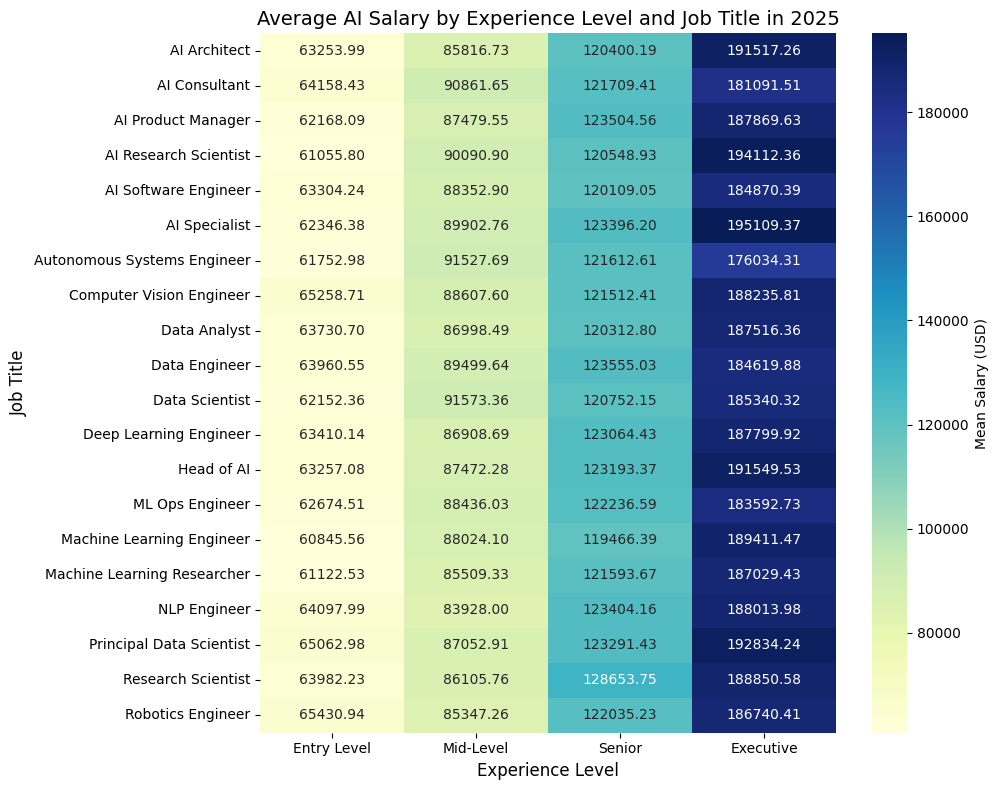

In [52]:
def plotAvgSalaryByExpPosition(pivotTable):
    plt.figure(figsize=(10, 8))
    sb.heatmap(pivotTable, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Mean Salary (USD)'})
    plt.title('Average AI Salary by Experience Level and Job Title in 2025', fontsize=14)
    plt.xlabel('Experience Level', fontsize=12)
    plt.ylabel('Job Title', fontsize=12)
    plt.tight_layout()
    #plt.savefig('salary_by_exp_pos_heatmap.png')
    plt.show()
plotAvgSalaryByExpPosition(pivotTable2)

In [11]:
print("\nKey Findings:")
print(f"Highest average salary location: {avgSalaryByLocation.iloc[0]['company_location']} "
      f"with ${avgSalaryByLocation.iloc[0]['mean_salary_usd']:,}")
print(f"Lowest average salary location: {avgSalaryByLocation.iloc[-1]['company_location']} "
      f"with ${avgSalaryByLocation.iloc[-1]['mean_salary_usd']:,}")
print(f"Number of unique locations: {len(avgSalaryByLocation)}")


Key Findings:
Highest average salary location: Switzerland with $170,639.09
Lowest average salary location: India with $84,236.05
Number of unique locations: 20


In [12]:
avgSalaryByResidentLocation = df.groupby('employee_residence')['salary_usd'].mean().reset_index()
avgSalaryByResidentLocation.columns = ['employee_residence', 'mean_salary_usd']
avgSalaryByResidentLocation['mean_salary_usd'] = avgSalaryByResidentLocation['mean_salary_usd'].round(2)
avgSalaryByResidentLocation = avgSalaryByResidentLocation.sort_values(by='mean_salary_usd', ascending=False)

print(f'Average Salary by Resident Location: {avgSalaryByResidentLocation}')

Average Salary by Resident Location:    employee_residence  mean_salary_usd
17        Switzerland        152765.49
4             Denmark        149951.57
13             Norway        143997.73
19      United States        137252.48
14          Singapore        124449.62
12        Netherlands        123302.20
18     United Kingdom        121897.28
16             Sweden        120635.12
7             Germany        119305.95
0           Australia        118227.90
2              Canada        118093.96
6              France        114783.08
10             Israel         96715.84
1             Austria         96675.06
11              Japan         96505.51
9             Ireland         95687.52
15        South Korea         95556.35
5             Finland         95181.86
8               India         93389.53
3               China         91990.80


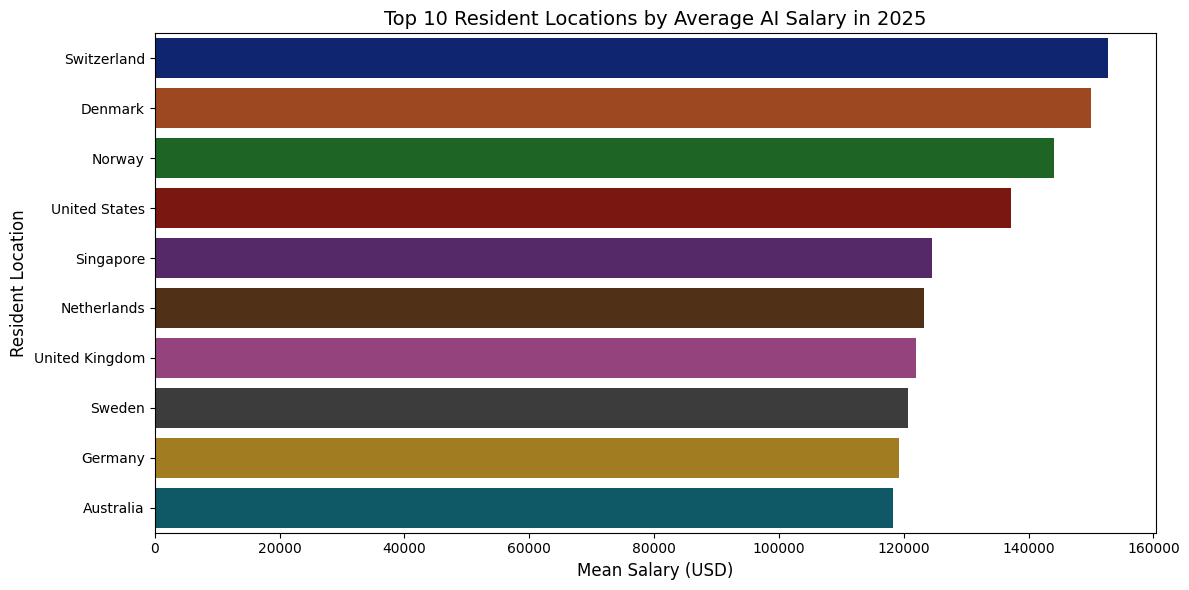

In [91]:
def plotTop10ResidentLocationsByAvgSalary(avgSalaryByResidentLocation):
    plt.figure(figsize=(12, 6))
    sb.barplot(data=avgSalaryByResidentLocation.head(10), x='mean_salary_usd', y='employee_residence', palette='dark', hue='employee_residence', legend=False)
    plt.title('Top 10 Resident Locations by Average AI Salary in 2025', fontsize=14)
    plt.xlabel('Mean Salary (USD)', fontsize=12)
    plt.ylabel('Resident Location', fontsize=12)
    plt.tight_layout()
    plt.savefig('avg_salary_by_resident_location_barplot.png', dpi=300)
    plt.show()
plotTop10ResidentLocationsByAvgSalary(avgSalaryByResidentLocation)

In [13]:

df['is_domestic'] = df['company_location'] == df['employee_residence']

# Step 2: Calculate distribution
distribution = df['is_domestic'].value_counts().reset_index()
distribution.columns = ['is_domestic', 'count']

distribution['employment_type'] = distribution['is_domestic'].map({True: 'Domestic (Same Country)', False: 'Cross-Border (Different Country)'})

distribution['percentage'] = (distribution['count'] / distribution['count'].sum() * 100).round(2)


print("Distribution of Domestic vs. Cross-Border Employment:")
print(distribution[['employment_type', 'count', 'percentage']])


print("\nKey Findings:")
print(f"Domestic employment: {distribution.loc[distribution['is_domestic'], 'count'].iloc[0]} jobs "
      f"({distribution.loc[distribution['is_domestic'], 'percentage'].iloc[0]}%)")
print(f"Cross-border employment: {distribution.loc[~distribution['is_domestic'], 'count'].iloc[0]} jobs "
      f"({distribution.loc[~distribution['is_domestic'], 'percentage'].iloc[0]}%)")

Distribution of Domestic vs. Cross-Border Employment:
                    employment_type  count  percentage
0           Domestic (Same Country)  10744       71.63
1  Cross-Border (Different Country)   4256       28.37

Key Findings:
Domestic employment: 10744 jobs (71.63%)
Cross-border employment: 4256 jobs (28.37%)


In [14]:
df['education_required'].unique()

array(['Bachelor', 'Master', 'Associate', 'PhD'], dtype=object)

In [15]:
educationMap = {
    'Associate': 1,
    'Bachelor': 2,
    'Master': 3,
    'PhD': 4
}

df['education_numeric'] = df['education_required'].map(educationMap).fillna(0)

In [16]:
avgEducation = df.groupby('experience_level')['education_numeric'].mean().reset_index()
avgEducation.columns = ['experience_level','mean_education_level']
avgEducation['mean_education_level'] = avgEducation['mean_education_level'].round(2)
avgEducation = avgEducation.sort_values(by='experience_level', key=lambda x: x.map({'Entry Level': 1, 'Mid-Level': 2, 'Senior': 3, 'Executive': 4}))

def mapEducationNumeric(value):
    if value <= 1.5:
        return "Associate's"
    elif value <= 2.5:
        return "Bachelor's"
    elif value <= 3.5:
        return "Master's"
    else:
        return 'PhD'
    
avgEducation['approx_education'] = avgEducation['mean_education_level'].apply(mapEducationNumeric)

print("\nAverage Education Level by Experience Level:")
print(avgEducation[['experience_level', 'mean_education_level', 'approx_education']])
    


Average Education Level by Experience Level:
  experience_level  mean_education_level approx_education
0      Entry Level                  2.49       Bachelor's
2        Mid-Level                  2.48       Bachelor's
3           Senior                  2.51         Master's
1        Executive                  2.47       Bachelor's


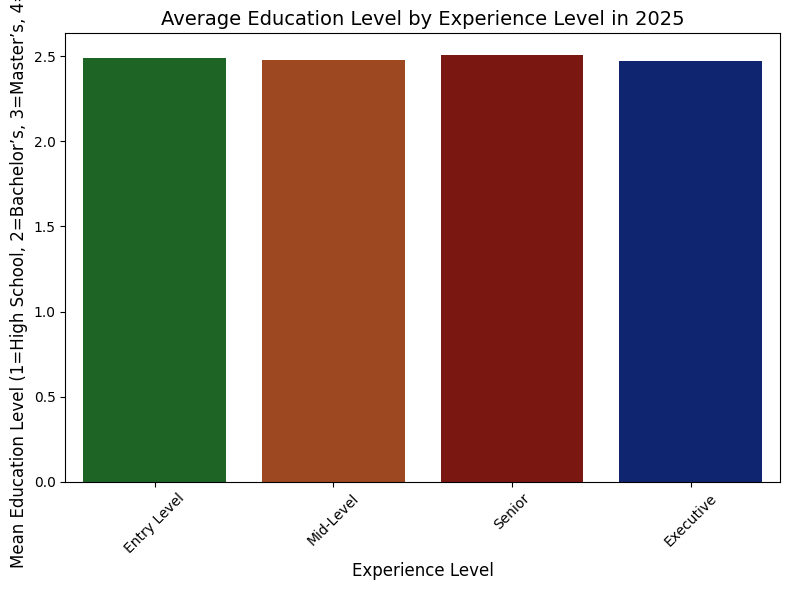

In [117]:
def plotMeanEducationLevelForPosition(avgEducation):
    # Step 4: Visualize as a bar plot
    plt.figure(figsize=(8, 6))
    sb.barplot(data=avgEducation, x='experience_level', y='mean_education_level', palette='dark', hue='mean_education_level', legend=False)
    plt.title('Average Education Level by Experience Level in 2025', fontsize=14)
    plt.xlabel('Experience Level', fontsize=12)
    plt.ylabel('Mean Education Level (1=High School, 2=Bachelor’s, 3=Master’s, 4=PhD)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    #plt.savefig('avg_education_by_experience_barplot.png', dpi=300)
    plt.show()
plotMeanEducationLevelForPosition(avgEducation)

In [17]:
# Update numericColumns to include mean_education_level
numericColumns = ["salary_usd", "remote_ratio", "years_experience"]

# Compute the correlation matrix
correlationMatrix = df[numericColumns].corr()

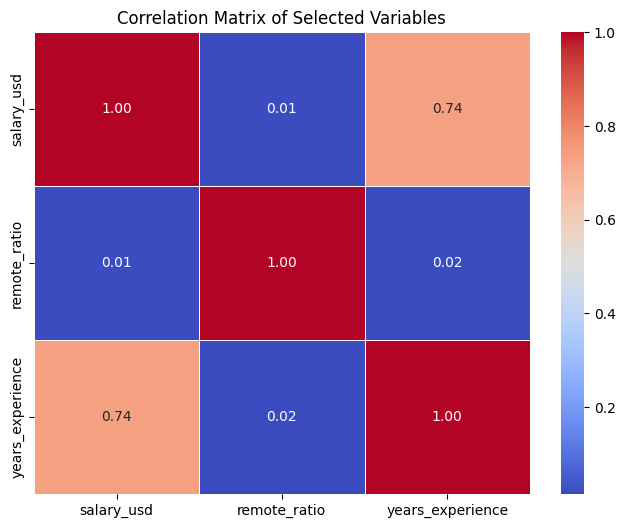

In [34]:
def plotCorrelationMatrix(correlationMatrix):
    # Plot the correlation heatmap
    plt.figure(figsize=(8, 6))
    sb.heatmap(correlationMatrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix of Selected Variables")
    plt.savefig('correlation_matrix.png')
    plt.show()

plotCorrelationMatrix(correlationMatrix)

In [18]:
# Step 1: Parse required_skills column
# Check unique values to understand format
print("Sample of required_skills values:")
print(df['required_skills'].head(5))

# Split comma-separated skills and clean them
def parse_skills(skills):
    if pd.isna(skills):
        return []
    # Split by comma, strip whitespace, and standardize case
    return [skill.strip().lower() for skill in skills.split(',')]

# Apply parsing to create a list of skills for each row
df['skills_list'] = df['required_skills'].apply(parse_skills)

# Step 2: Count skill frequencies
# Flatten the list of skills and count frequencies
allSkills = [skill for skills in df['skills_list'] for skill in skills]
skillsCounts = Counter(allSkills)
# Convert to DataFrame for easier handling
skillDf = pd.DataFrame(skillsCounts.items(), columns=['skill', 'count'])
skillDf = skillDf.sort_values(by='count', ascending=False)

# Print top 10 skills
print("\nTop 10 Most In-Demand Skills:")
print(skillDf.head(10))



# Step 4: Visualize with a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      max_words=50, colormap='viridis').generate_from_frequencies(skillsCounts)


# Step 5: Summarize key findings
print("\nKey Findings:")
print(f"Most in-demand skill: {skillDf.iloc[0]['skill']} with {skillDf.iloc[0]['count']} job postings")
print(f"Total unique skills: {len(skillDf)}")

Sample of required_skills values:
0           Tableau, PyTorch, Kubernetes, Linux, NLP
1    Deep Learning, AWS, Mathematics, Python, Docker
2       Kubernetes, Deep Learning, Java, Hadoop, NLP
3                          Scala, SQL, Linux, Python
4                       MLOps, Java, Tableau, Python
Name: required_skills, dtype: object

Top 10 Most In-Demand Skills:
         skill  count
8       python   4450
13         sql   3407
21  tensorflow   3022
2   kubernetes   3009
12       scala   2794
1      pytorch   2777
3        linux   2705
19         git   2631
10        java   2578
20         gcp   2442

Key Findings:
Most in-demand skill: python with 4450 job postings
Total unique skills: 24


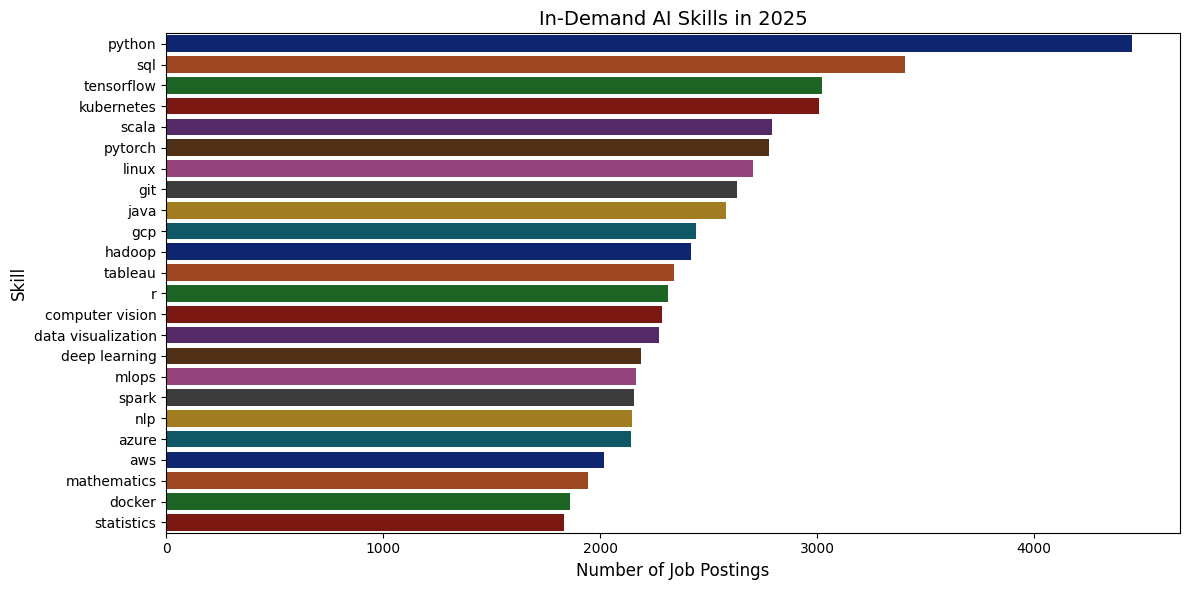

In [44]:
def plotSkillsBarChart(skillsDf):
    # Step 3: Visualize with a bar chart
    plt.figure(figsize=(12, 6))
    sb.barplot(data=skillsDf, x='count', y='skill', hue='skill', palette='dark', legend=False)
    plt.title('In-Demand AI Skills in 2025', fontsize=14)
    plt.xlabel('Number of Job Postings', fontsize=12)
    plt.ylabel('Skill', fontsize=12)
    plt.tight_layout()
    plt.savefig('skills_barplot.png', dpi=300)
    plt.show()
plotSkillsBarChart(skillDf)

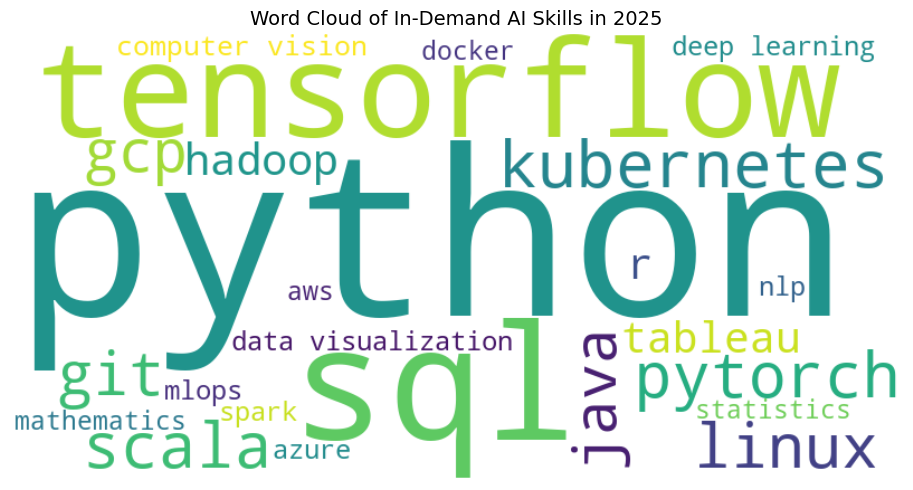

In [124]:
def skillsWordCloud(wordcloud):
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of In-Demand AI Skills in 2025', fontsize=14)
    plt.tight_layout()
    plt.savefig('skills_wordcloud.png', dpi=300)
    plt.show()
skillsWordCloud(wordcloud)

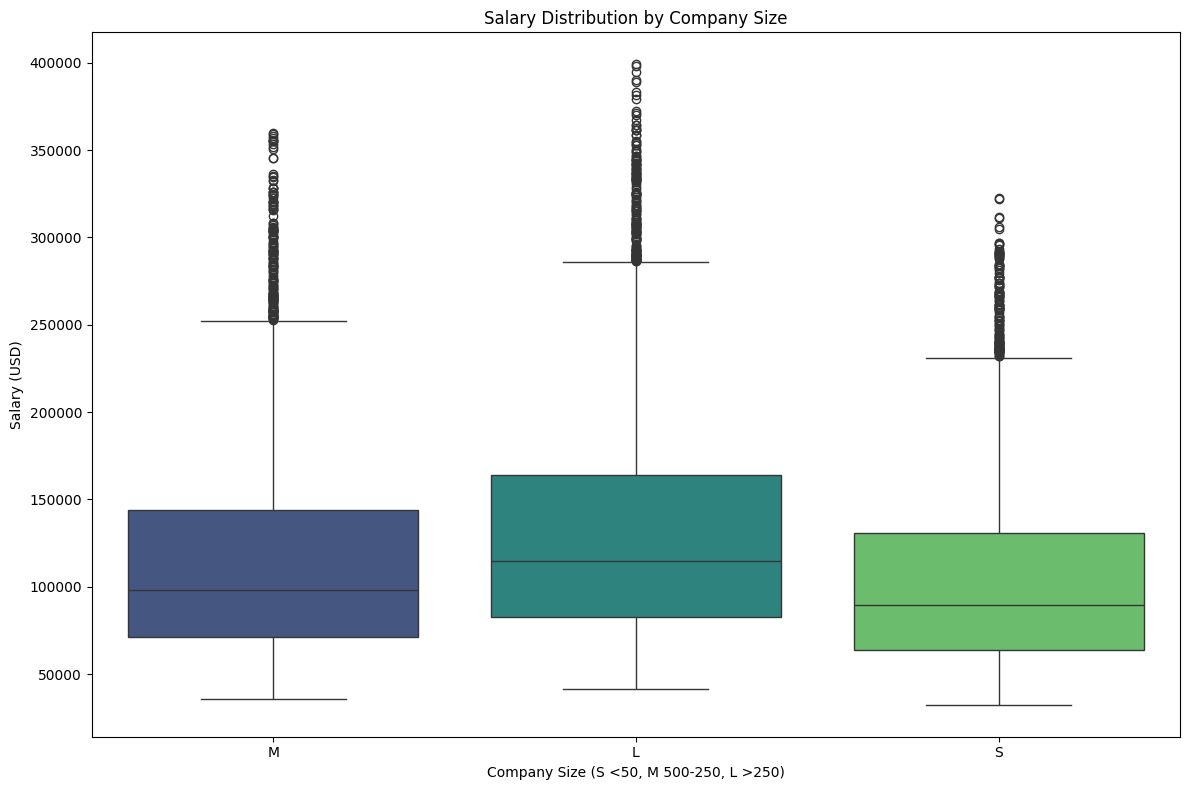

In [47]:
def plotCompanySizeVsSalary(df):
    plt.figure(figsize=(12, 8))
    sb.boxplot(data=df, x='company_size', y='salary_usd', hue='company_size', palette='viridis', legend=False)
    plt.title('Salary Distribution by Company Size')
    plt.ylabel('Salary (USD)')
    plt.xlabel('Company Size (S <50, M 500-250, L >250)')
    plt.tight_layout()
    plt.savefig('boxplot_company_size_salary.png')
    plt.show()

plotCompanySizeVsSalary(df)

In [24]:
df["posting_date"] = pd.to_datetime(df["posting_date"])

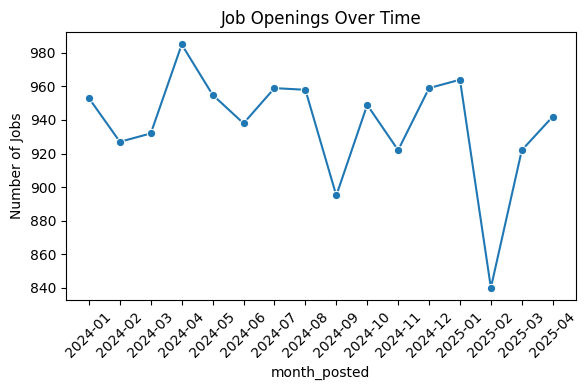

In [30]:
# 6. Job Openings Over Time
df['month_posted'] = df['posting_date'].dt.to_period('M').astype(str)
fig1, ax1 = plt.subplots(figsize=(6, 4))
monthly_counts = df['month_posted'].value_counts().sort_index()
sb.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o', ax=ax1)
ax1.set_title("Job Openings Over Time")
ax1.set_ylabel("Number of Jobs")
plt.xticks(rotation=45)
#plt.savefig('job_openings_over_time.png')
plt.tight_layout()
plt.show()